## Gráfico de Barras
Vamos construir um gráfico de barras usando os dados do dataset Ebola.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ebola.csv')

In [4]:
df.head()

,Countries,Type,Number_of_cases,Death
0,Guinea,comfirmed cases,3351,2083
1,Guinea,Probable cases,453,453
2,Sierra Leone,comfirmed cases,8704,3589
3,Sierra Leone,Probable cases,287,208
4,Sierra Leone,Suspected cases,5131,158


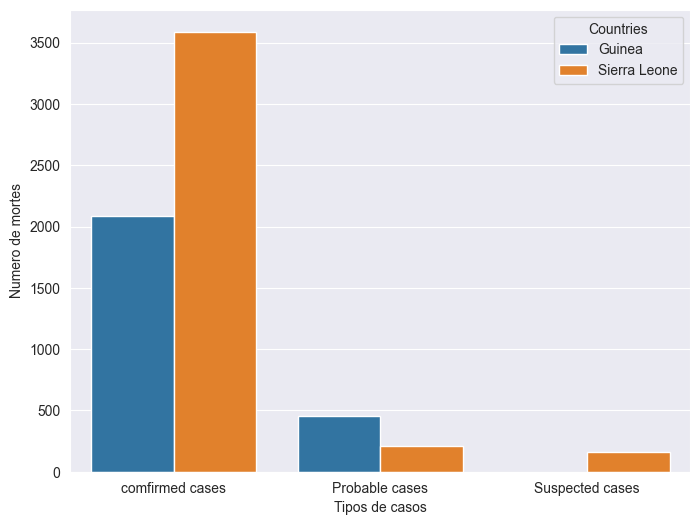

In [7]:
plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')
sns.barplot(x='Type', y='Death', hue='Countries', data=df, errorbar=None)
plt.xlabel('Tipos de casos')
plt.ylabel('Numero de mortes')
plt.show()

Vamos agora trabalhar com o dataset Migrants.csv. O primeiro passo é entender esse dataset, então vamos exibir alguns registros inicialmente.

In [8]:
df = pd.read_csv('migrants.csv')

In [9]:
df.head()

,Web ID,Region_of_Incident,Reported_Year,Number_Dead,Total_Dead_and_Missing
0,44025,US-Mexico Border,2017,10.0,10
1,44026,Mediterranean,2017,NaN,2
2,44027,Mediterranean,2017,1.0,1
3,44017,US-Mexico Border,2017,1.0,1
4,44024,US-Mexico Border,2017,1.0,1


Vamos ver as diferentes regiões onde os incidentes aconteceram.

In [10]:
df['Region_of_Incident'].unique()

array(['US-Mexico Border', 'Mediterranean', 'Middle East', 'Europe',
       'Central America', 'Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Southeast Asia', 'North Africa', 'Horn of Africa',
       'North America', 'East Asia', 'South America'], dtype=object)

In [17]:
df = df[~df['Region_of_Incident'].isin(['North Africa', 'North Africa', 'Caribbean'])]
df

,Web ID,Region_of_Incident,Reported_Year,Number_Dead,Total_Dead_and_Missing
0,44025,US-Mexico Border,2017,10.0,10
1,44026,Mediterranean,2017,NaN,2
2,44027,Mediterranean,2017,1.0,1
3,44017,US-Mexico Border,2017,1.0,1
4,44024,US-Mexico Border,2017,1.0,1
...,...,...,...,...,...
3177,39207,US-Mexico Border,2014,1.0,1
3178,39368,Europe,2014,1.0,1
3179,39257,US-Mexico Border,2014,1.0,1
3180,39256,US-Mexico Border,2014,1.0,1


In [24]:
df2 = pd.crosstab(df['Region_of_Incident'], df['Reported_Year'], values=df['Total_Dead_and_Missing'], aggfunc='sum')
df2

Reported_Year,2014,2015,2016,2017
Region_of_Incident,,,,
Central America,116.0,101.0,181.0,76.0
East Asia,9.0,15.0,3.0,1.0
Europe,20.0,136.0,62.0,90.0
Horn of Africa,265.0,135.0,235.0,170.0
Mediterranean,3283.0,3785.0,5143.0,3095.0
Middle East,39.0,36.0,114.0,208.0
North America,NaN,NaN,NaN,1.0
South America,NaN,2.0,32.0,NaN
South Asia,2.0,NaN,NaN,21.0


Agora vamos criar um gráfico de barras mostrando o número de mortos e desaparecidos no ano de 2016.

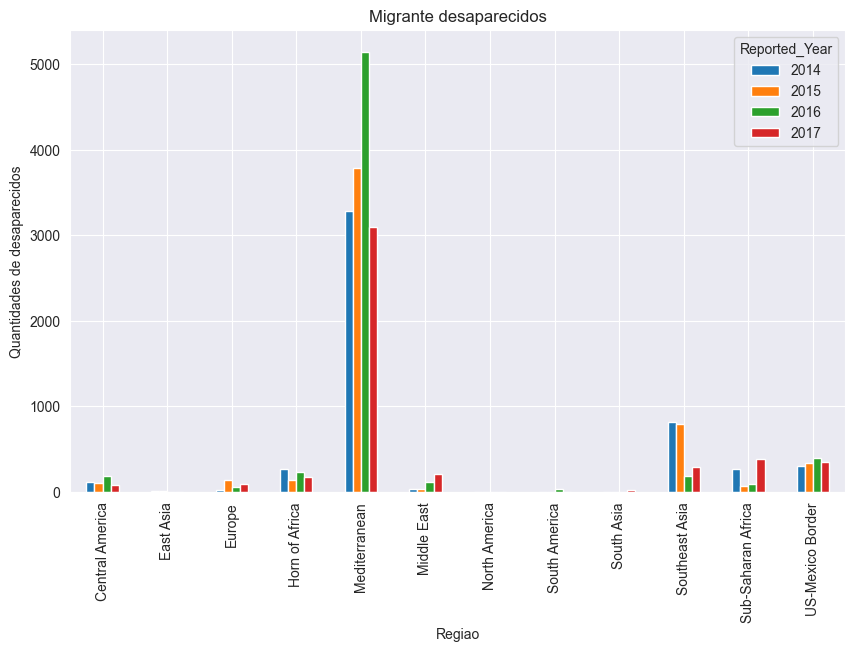

In [25]:
plt.rcParams['figure.figsize'] = [10,6]
sns.set_style('darkgrid')
df2.plot(kind='bar', stacked=False)
plt.title('Migrante desaparecidos')
plt.ylabel('Quantidades de desaparecidos')
plt.xlabel('Regiao')
plt.show()